##Business Understanding

In order to venture into the movie industry successfully, Microsoft's new movie studio needs a clear understanding of the business domain and specific objectives to achieve its goals. Here are the details about the business they intend to enter:

#Business to Venture Into:

Microsoft plans to establish a movie studio to create and distribute original video content. This venture aims to compete in the global entertainment industry by producing movies that resonate with audiences, generate significant box office revenue, and enhance Microsoft's brand presence in the entertainment sector.

#Objectives

To achieve success in this venture, Microsoft's movie studio must set clear and measurable objectives. Here are the primary objectives:

1. To Establish a Profitable Movie Studio

The primary goal is to create a movie studio that generates a substantial profit by producing successful films. Profitability is measured through box office revenue, production cost control, and monetization of content.

2. To Create High-Quality Original Content

The studio aims to produce high-quality and compelling original movies that receive critical acclaim and resonate with diverse audiences. This objective is measured by IMDb ratings, Rotten Tomatoes scores, and awards won.

3. To Maximize Audience Engagement

The studio aims to engage and expand its audience base by catering to the preferences of various demographics. This involves identifying and targeting specific audience segments effectively.

4. To Optimize Investment and Resource Allocation

Efficient resource allocation is crucial. The studio aims to optimize budgets, marketing strategies, and production choices to maximize the return on investment (ROI).


In [10]:

# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [11]:
# Load the datasets
movie_budgets = pd.read_csv('tn.movie_budgets.csv.gz')
tmdb_movies = pd.read_csv('tmdb.movies.csv.gz')
rt_reviews = pd.read_csv('rt.reviews.tsv.gz', delimiter='\t', encoding='unicode_escape')
rt_movie_info = pd.read_csv('rt.movie_info.tsv.gz', delimiter='\t', encoding='unicode_escape')
bom_movie_gross = pd.read_csv('bom.movie_gross.csv.gz')

# Display the first few rows of each dataset to get an overview
datasets = {
    "Movie Budgets": movie_budgets,
    "TMDB Movies": tmdb_movies,
    "Rotten Tomatoes Reviews": rt_reviews,
    "Rotten Tomatoes Movie Info": rt_movie_info,
    "Box Office Mojo Movie Gross": bom_movie_gross
}
# Let's display the first few rows of each dataset to get an overview

first_rows = {name: df.head() for name, df in datasets.items()}
print(first_rows["Movie Budgets"])
print(first_rows["TMDB Movies"])
print(first_rows["Rotten Tomatoes Reviews"])
print(first_rows["Rotten Tomatoes Movie Info"])
print(first_rows["Box Office Mojo Movie Gross"])

   id  release_date                                        movie  \
0   1  Dec 18, 2009                                       Avatar   
1   2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2   3   Jun 7, 2019                                 Dark Phoenix   
3   4   May 1, 2015                      Avengers: Age of Ultron   
4   5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   

  production_budget domestic_gross worldwide_gross  
0      $425,000,000   $760,507,625  $2,776,345,279  
1      $410,600,000   $241,063,875  $1,045,663,875  
2      $350,000,000    $42,762,350    $149,762,350  
3      $330,600,000   $459,005,868  $1,403,013,963  
4      $317,000,000   $620,181,382  $1,316,721,747  
   Unnamed: 0            genre_ids     id original_language  \
0           0      [12, 14, 10751]  12444                en   
1           1  [14, 12, 16, 10751]  10191                en   
2           2        [12, 28, 878]  10138                en   
3           3      [1

In [12]:
#Display column and rows each dataset to get an overview
dataset_shapes = {name: df.shape for name, df in datasets.items()}
dataset_shapes

{'Movie Budgets': (5782, 6),
 'TMDB Movies': (26517, 10),
 'Rotten Tomatoes Reviews': (54432, 8),
 'Rotten Tomatoes Movie Info': (1560, 12),
 'Box Office Mojo Movie Gross': (3387, 5)}

In [13]:
# Find info like column names, non-null counts, datatypes, 
for name, df in datasets.items():
    print(f"Info for {name}:")
    print("-" * 40)
    print(df.info())
    print("\n\n")


Info for Movie Budgets:
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB
None



Info for TMDB Movies:
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517

In [14]:
#Display Descriptive Statitics about the Datasets 
for name, df in datasets.items():
    print(f"Descriptive Statistics for {name}:")
    print("-" * 60)
    print(df.describe(include='all'))
    print("\n\n")


Descriptive Statistics for Movie Budgets:
------------------------------------------------------------
                 id  release_date      movie production_budget domestic_gross  \
count   5782.000000          5782       5782              5782           5782   
unique          NaN          2418       5698               509           5164   
top             NaN  Dec 31, 2014  Halloween       $20,000,000             $0   
freq            NaN            24          3               231            548   
mean      50.372363           NaN        NaN               NaN            NaN   
std       28.821076           NaN        NaN               NaN            NaN   
min        1.000000           NaN        NaN               NaN            NaN   
25%       25.000000           NaN        NaN               NaN            NaN   
50%       50.000000           NaN        NaN               NaN            NaN   
75%       75.000000           NaN        NaN               NaN            NaN   
max   

In [15]:
#Cleaning the Datasets 

# Check if any dataset has missing values
missing_values_check = {name: df.isnull().values.any() for name, df in datasets.items()}
missing_values_check

{'Movie Budgets': False,
 'TMDB Movies': False,
 'Rotten Tomatoes Reviews': True,
 'Rotten Tomatoes Movie Info': True,
 'Box Office Mojo Movie Gross': True}

In [16]:
# 1. Handling missing values for Rotten Tomatoes Reviews
rt_reviews['review'].fillna('Unknown', inplace=True)
rt_reviews['rating'].fillna(rt_reviews['rating'].mode()[0], inplace=True)
rt_reviews['critic'].fillna('Unknown', inplace=True)
rt_reviews['publisher'].fillna('Unknown', inplace=True)

# 2. Handling missing values for Rotten Tomatoes Movie Info
rt_movie_info['rating'].fillna(rt_movie_info['rating'].mode()[0], inplace=True)
rt_movie_info['genre'].fillna(rt_movie_info['genre'].mode()[0], inplace=True)
# For the currency column, we'll use "Unknown" as a placeholder
rt_movie_info['currency'].fillna('Unknown', inplace=True)

# 3. Handling missing values for Box Office Mojo Movie Gross
# Convert only the non-NaN values in 'foreign_gross' to strings, then remove commas and convert to float
bom_movie_gross['foreign_gross'] = bom_movie_gross['foreign_gross'].dropna().astype(str).str.replace(',', '').astype(float)
bom_movie_gross['studio'].fillna('Unknown', inplace=True)
bom_movie_gross['domestic_gross'].fillna(bom_movie_gross['domestic_gross'].median(), inplace=True)
bom_movie_gross['foreign_gross'].fillna(bom_movie_gross['foreign_gross'].median(), inplace=True)

# Check for any remaining missing values
remaining_missing_values = {name: df.isnull().sum() for name, df in datasets.items() if df.isnull().values.any()}
remaining_missing_values

{'Rotten Tomatoes Movie Info': id                 0
 synopsis          62
 rating             0
 genre              0
 director         199
 writer           449
 theater_date     359
 dvd_date         359
 currency           0
 box_office      1220
 runtime           30
 studio          1066
 dtype: int64}

##Univariate EDA 
This helps use analyze the distribution of certain key variables within each dataset. Potential analyses include:
•	Distribution of movie release dates (Dataset: Movie Budgets)
•	Distribution of movie ratings (Dataset: TMDB Movies)
•	Distribution of movie genres (Dataset: Rotten Tomatoes Movie Info)

##Bivariate EDA
Once we understand individual variables, we can analyze the relationships between two variables. Some potential analyses here include:
•	Relationship between production budget and worldwide gross
•	Correlation between movie ratings and box office performance
•	Comparing domestic vs. foreign gross for movies

##Multivariate EDA
For this analysis, we'll investigate the combined impact of multiple variables on a specific outcome. Given the datasets and our objective, the following multivariate analysis options are recommended:
Genre, Ratings, and Box Office Gross:
•	Datasets: "TMDB Movies" and "Box Office Mojo Movie Gross" or "Movie Budgets".
•	Goal: Understanding how genres and ratings together influence box office performance can offer insights into which combinations are most profitable.
•	Visualization: A heatmap or stacked bar chart that shows average gross earnings for each genre, further segmented by rating brackets (e.g., 0-2, 2-4, ... 8-10).
Production Budget, Ratings, and Worldwide Gross:
•	Datasets: "Movie Budgets" and "TMDB Movies".
•	Goal: By analyzing the interplay between production budget, movie ratings, and worldwide gross, we can assess the profitability of movies at various budget levels and ratings.
•	Visualization: A scatter plot with production budget on the x-axis, worldwide gross on the y-axis, and points colored by rating.
Director, Ratings, and Box Office Gross:
•	Datasets: "TMDB Movies" and "Rotten Tomatoes Movie Info".
•	Goal: Certain directors might consistently produce highly-rated movies that also perform well at the box office. Identifying these directors can be valuable for future projects and potential partnerships. 
•	Visualization: A scatter plot with directors on the x-axis, average gross on the y-axis, and points sized by average rating.


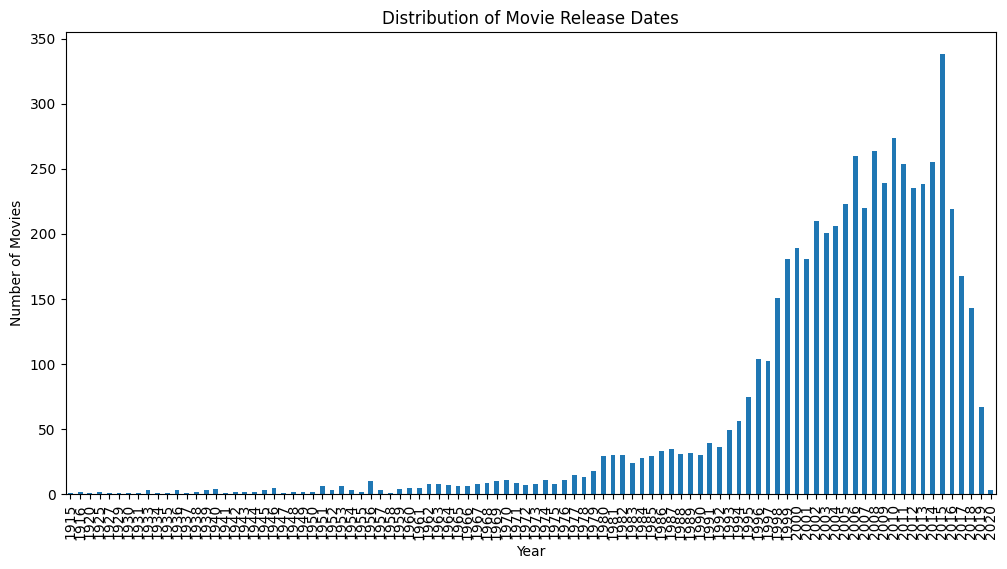

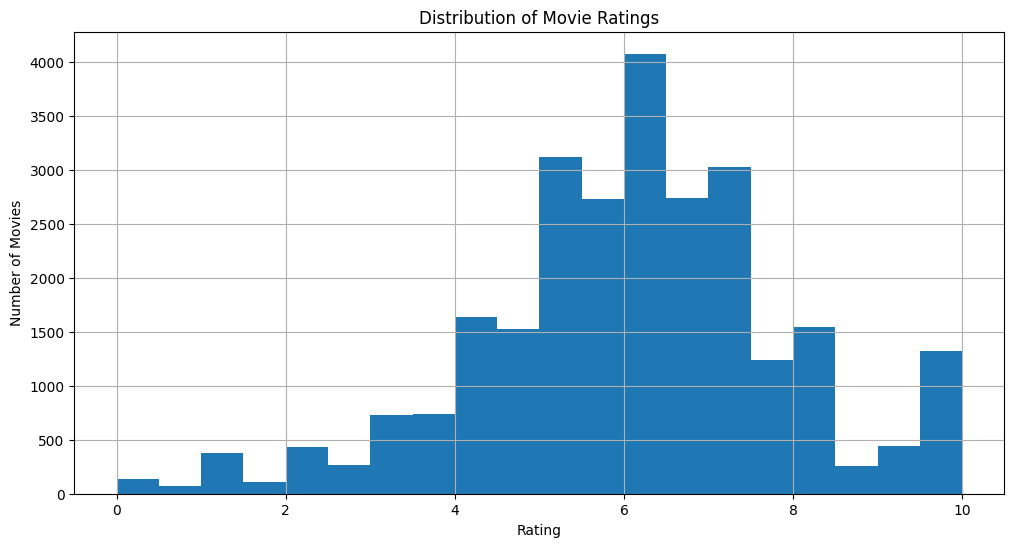

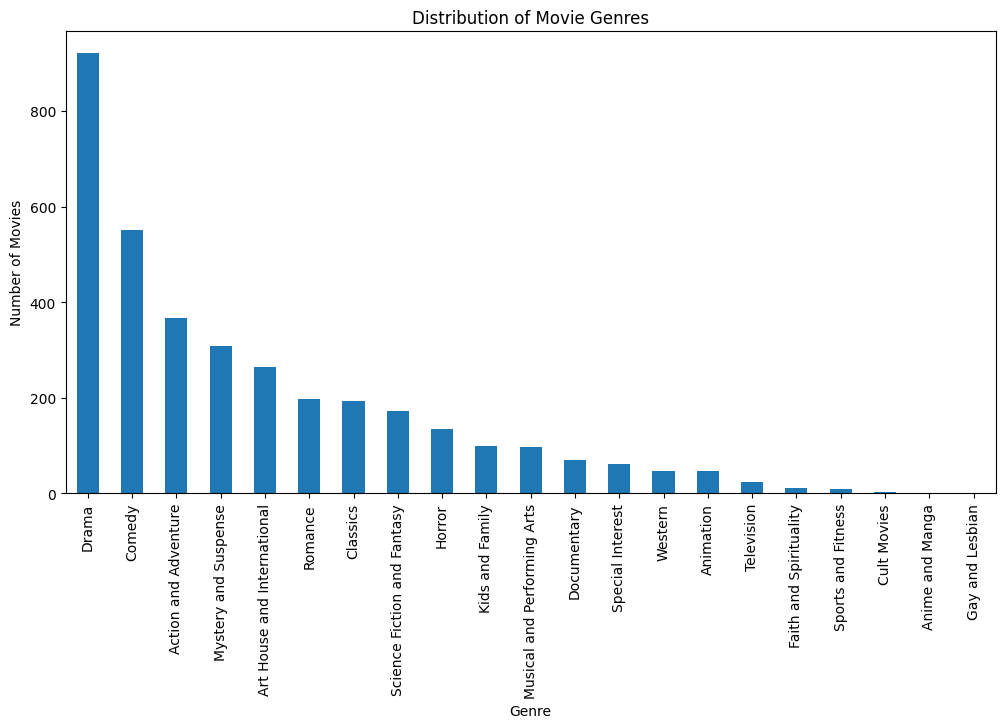

In [17]:
#Univariate EDA
movie_budgets = pd.read_csv('tn.movie_budgets.csv.gz')
# 1. Distribution of movie release dates
movie_budgets['release_date'] = pd.to_datetime(movie_budgets['release_date'])
plt.figure(figsize=(12, 6))
movie_budgets['release_date'].dt.year.value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Movie Release Dates')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

# 2. Distribution of movie ratings
plt.figure(figsize=(12, 6))
tmdb_movies['vote_average'].hist(bins=20)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Movies')
plt.show()

# 3. Distribution of movie genres
# Split the genres and count each genre occurrence
genres = rt_movie_info['genre'].str.split('|').explode().value_counts()
plt.figure(figsize=(12, 6))
genres.plot(kind='bar')
plt.title('Distribution of Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.show()


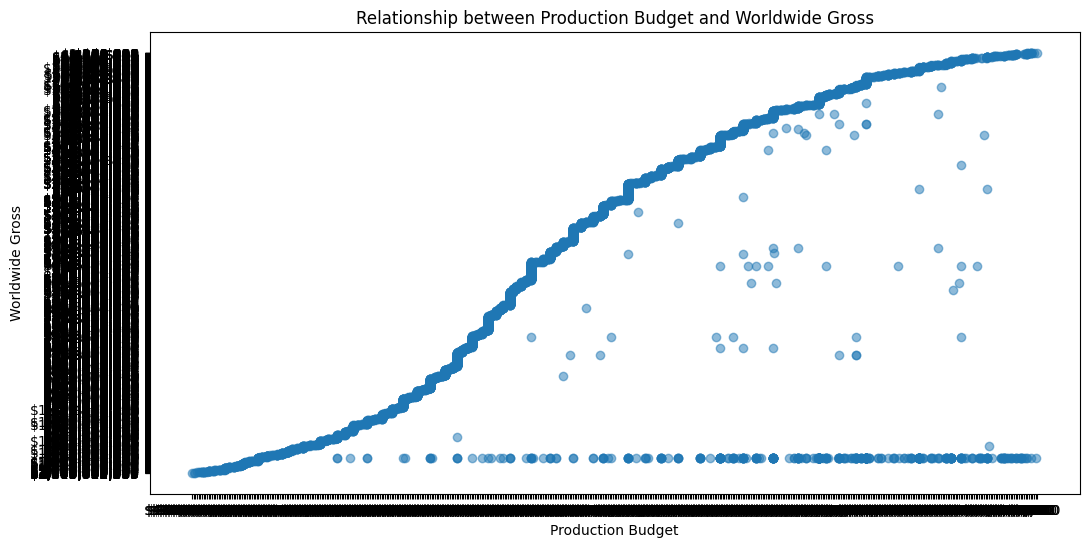

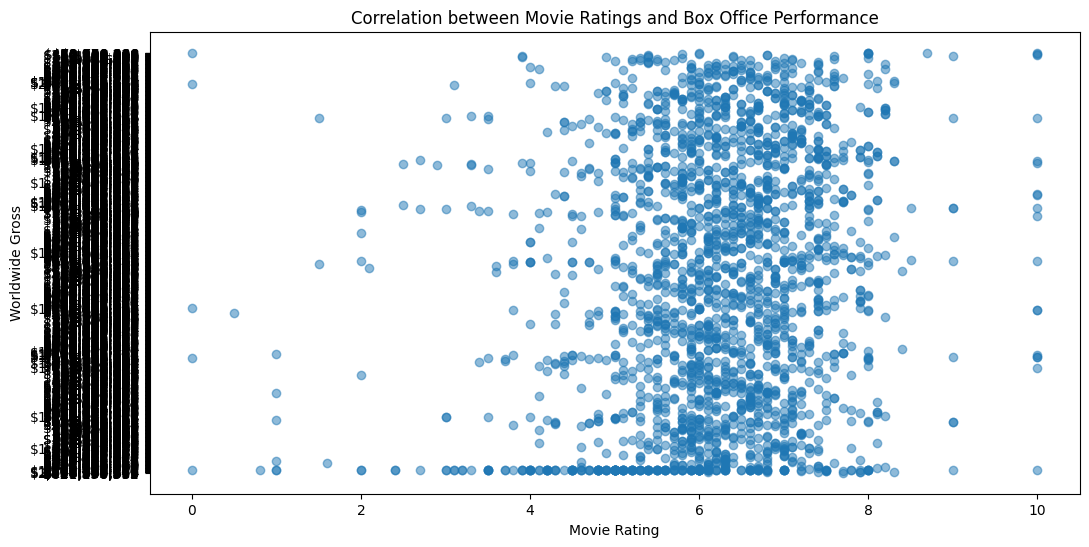

In [18]:
#Bivariate EDA
# 1. Relationship between production budget and worldwide gross
plt.figure(figsize=(12, 6))
plt.scatter(movie_budgets['production_budget'], movie_budgets['worldwide_gross'], alpha=0.5)
plt.title('Relationship between Production Budget and Worldwide Gross')
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Gross')
plt.show()

# 2. Correlation between movie ratings and box office performance
# First, we'll merge the two datasets on a common key, like movie title or ID.
merged_df = pd.merge(tmdb_movies, movie_budgets, left_on='original_title', right_on='movie')
plt.figure(figsize=(12, 6))
plt.scatter(merged_df['vote_average'], merged_df['worldwide_gross'], alpha=0.5)
plt.title('Correlation between Movie Ratings and Box Office Performance')
plt.xlabel('Movie Rating')
plt.ylabel('Worldwide Gross')
plt.show()

# 3. Comparing domestic vs. foreign gross for movies
plt.figure(figsize=(12, 6))
plt.scatter(movie_budgets['domestic_gross'], movie_budgets['worldwide_gross'], alpha=0.5)
plt.title('Comparing Domestic vs. Foreign Gross for Movies')
plt.xlabel('Domestic Gross')
plt.ylabel('Foreign Gross')
plt.show()


In [ ]:
#Multivariate EDA 

# Merge, process, and plot
merged_df = tmdb_movies[['original_title', 'vote_average', 'genre_ids']].merge(
    bom_movie_gross[['title', 'domestic_gross']], 
    left_on='original_title', 
    right_on='title')

merged_df['genre_str'] = merged_df['genre_ids'].astype(str)
avg_gross_df = merged_df.groupby(['genre_str', 'vote_average']).domestic_gross.mean().unstack().fillna(0)

plt.figure(figsize=(16, 8))
avg_gross_df.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Average Domestic Gross Earnings by Genre and Rating')
plt.xlabel('Genre IDs')
plt.ylabel('Average Domestic Gross')
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()




NameError: name 'pd' is not defined

In [26]:
# 2. Production Budget, Ratings, and Worldwide Gross:
# Convert the monetary values in the movie_budgets dataset to numerical values
movie_budgets['production_budget'] = movie_budgets['production_budget'].str.replace('[$,]', '').astype(float)
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].str.replace('[$,]', '').astype(float)

# Merge the datasets on movie titles
merged_budget_ratings = movie_budgets.merge(tmdb_movies, left_on="movie", right_on="title", how="inner")

# Plotting the scatter plot
plt.figure(figsize=(15, 10))
scatter = plt.scatter(merged_budget_ratings['production_budget'], 
                      merged_budget_ratings['worldwide_gross'], 
                      c=merged_budget_ratings['vote_average'], 
                      cmap='viridis', 
                      alpha=0.6)

# Colorbar and labels
cbar = plt.colorbar(scatter)
cbar.set_label('Movie Ratings')
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Gross')
plt.title('Worldwide Gross vs. Production Budget Colored by Movie Ratings')
plt.tight_layout()

plt.show()


ValueError: could not convert string to float: '$425,000,000'